In [1]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import copy
from tqdm import tqdm

In [2]:
from wheat_data import noise_loader

In [3]:
class Params:
    def __init__(self, file=r'./params.yml'):
        self.params = yaml.safe_load(open(file).read())

    def __getattr__(self, item):
        return self.params.get(item, None)
params = Params(r'./params.yml')


In [4]:
train_loader, val_loader, train_set = noise_loader(params)

In [5]:
 i, data = next(enumerate(train_loader.__iter__(0)))

In [6]:
data['imgs'].shape

torch.Size([32, 3, 512, 512])

In [5]:
n = 306
data = train_set[n]
bboxes = data['bboxes']


In [6]:
bboxes = data['bboxes']

In [7]:
img = cv2.imread(os.path.join(params.input_dir, 'train', train_set.img_ids[n]+'.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512, 512))
# img2 = copy.deepcopy(img)

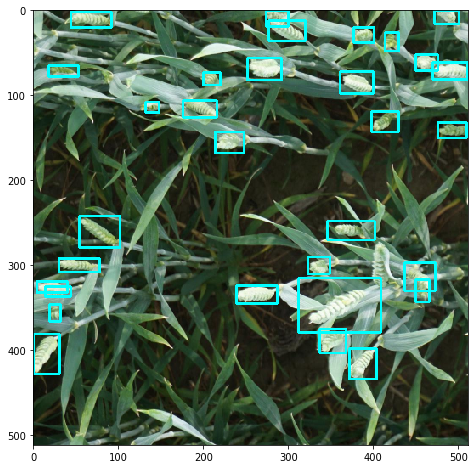

In [8]:
plt.figure(figsize=(8,8))
for box in bboxes.astype(int):
    cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 255), 2)
plt.imshow(img)

In [9]:
def get_box(bboxes, n):
    x1 = bboxes[n, 0].astype(int)
    y1 = bboxes[n, 1].astype(int)
    x2 = bboxes[n, 2].astype(int)
    y2 = bboxes[n, 3].astype(int)
    return copy.deepcopy(data['img'][y1:y2, x1:x2])

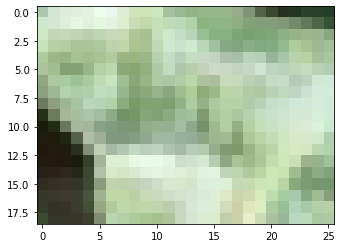

In [65]:
box = get_box(bboxes, 23)
box2 = get_box(bboxes, 8)
gray = cv2.cvtColor(box2,cv2.COLOR_RGB2GRAY)
# box = np.round(box[::-1] * 0.2 + box * 0.8).astype(int)
_, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(gray, 'gray')
# plt.imshow(box2)


In [152]:
box.shape

(46, 72, 3)

In [50]:
gray

array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [16]:
cv2.THRESH_BINARY

0

In [39]:
# plt.figure(figsize=(16,8))
# plt.subplots_adjust(wspace = 0.05)

# for box in bboxes.astype(int):
#     cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 255), 2)
# for box in new_boxes.astype(int):
#     cv2.rectangle(img2, (box[0], box[1]), (box[2], box[3]), (0, 255, 255), 2)

# ax1 = plt.subplot(121)
# ax1.set_axis_off()
# ax1.imshow(img)

# ax2 = plt.subplot(122)
# ax2.set_axis_off()
# ax2.imshow(img2)

In [40]:
bboxes[5, 0].astype(int)

359

In [11]:
import torch.nn.functional as F

In [18]:
criterion = torch.nn.BCEWithLogitsLoss()
criterion2 = torch.nn.CrossEntropyLoss()


In [37]:
target = torch.ones((10,), dtype=torch.float32)
output = torch.full((10,), 1.5)
criterion(output, target)

tensor(0.2014)

In [28]:
torch.full((10,), 1.5)
torch.ones((10,), dtype=torch.float32)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([1, 2, 1])

In [62]:
a = torch.tensor([[0,0,0,1], [1,0,0,0], [0,1,0,0]], dtype=torch.float32)
b = torch.tensor([[0,0,0,1], [1,0,0,0], [0,1,0,0]], dtype=torch.float32)
criterion(a, b)

tensor(0.5982)

In [1]:
from sklearn.model_selection import KFold

In [2]:
kf = KFold(n_splits=5)

In [3]:
kf.split([1,2,3,4,5,6,7,8,9,10])

<generator object _BaseKFold.split at 0x7faf82bad780>

In [16]:
val_folds = [[train.tolist(), val.tolist()] for train, val in kf.split(['a','b','c','d','e'])]

In [18]:
val_folds[0]

[[1, 2, 3, 4], [0]]